In [7]:
!pip install Pillow




   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 25.7 MB/s eta 0:00:00


In [1]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np



In [2]:
!pip uninstall -y numpy
!pip install numpy==1.22.0


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ------------------- -------------------- 7.1/14.7 MB 39.6 MB/s eta 0:00:01
   ---------------------- ----------------- 8.4/14.7 MB 39.8 MB/s eta 0:00:01
   ---------------------------- ----------- 10.5/14.7 MB 16.8 MB/s eta 0:00:01
   ---------------------------------- ----- 12.6/14.7 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------- 14.7/14.7 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires keras-preprocessing>=1.1.1, which is not installed.
contourpy 1.3.1 requires numpy>=1.23, but you have numpy 1.22.0 which is incompatible.
matplotlib 3.10.1 requires numpy>=1.23, but you have numpy 1.22.0 which is incompatible.
pandas 2.2.3 requires numpy>=1.22.4; python_version < "3.11", but you have numpy 1.22.0 which is incompatible.
scipy 1.15.2 requires numpy<2.5,>=1.23.5, but you have numpy 1.22.0 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [5]:
!pip install --upgrade tensorflow keras


  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl (375.7 MB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------

In [9]:
from PIL import Image
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Model architecture
model = Sequential([
    Conv2D(100, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(100, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')  # <-- 2 outputs
])

# ✅ Use categorical crossentropy for softmax
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

TRAINING_DIR = "C:\\Users\\nocti\\Downloads\\face-mask-dataset\\Dataset\\train"
train_datagen = ImageDataGenerator(rescale=1.0/255)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\nocti\Downloads\face-mask-dataset\Dataset\train\train",
    target_size=(150, 150),
    batch_size=10,
    class_mode='sparse'  # <-- Must match softmax output
)

validation_generator = validation_datagen.flow_from_directory(
    r"C:\Users\nocti\Downloads\face-mask-dataset\Dataset\test\test",
    target_size=(150, 150),
    batch_size=10,
    class_mode='sparse'  # <-- Must match softmax output
)


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    target_size=(150, 150))
VALIDATION_DIR = "C:\\Users\\nocti\\Downloads\\face-mask-dataset\\Dataset\\test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)


checkpoint = ModelCheckpoint('model2-{epoch:03d}.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)




Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Found 1315 images belonging to 1 classes.
Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 80s 574ms/step - accuracy: 0.9959 - loss: 0.0254 - val_accuracy: 0.5000 - val_loss: 371.8798
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 72s 543ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 371.8806
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 71s 540ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 371.8806
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 72s 546ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 371.8806
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 73s 550ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 371.8806
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 73s 553ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 371.8806
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 71s 532ms/step - 

In [6]:
TRAINING_DIR = "C:\\Users\\nocti\\Downloads\\face-mask-dataset\\Dataset\\train"
VALIDATION_DIR = "C:\\Users\\nocti\\Downloads\\face-mask-dataset\\Dataset\\test"


In [21]:
!pip install pandas



  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.5 MB 16.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.5 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 23.2 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ----

In [15]:
import os
from PIL import Image

directory = "C:\\Users\\nocti\\Downloads\\face-mask-dataset\\Dataset\\test\\test"

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(root, file)
            try:
                img = Image.open(path)
                img.verify()  # Checks for corrupted images
            except Exception as e:
                print(f"Corrupt image found: {path} — {e}")


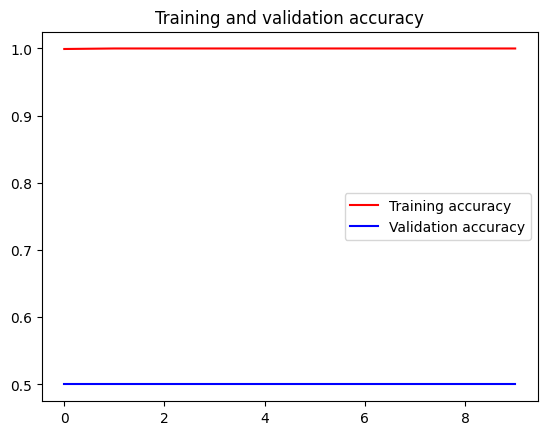

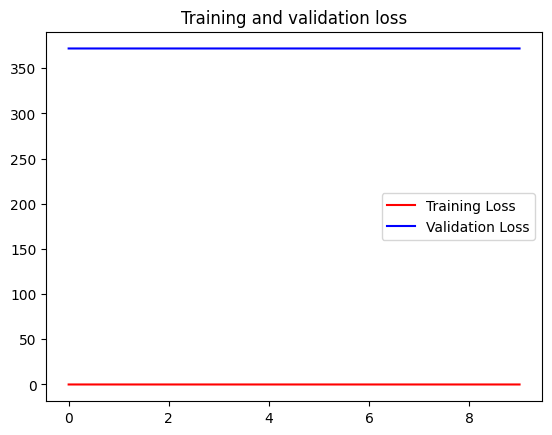

In [14]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import resample
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = r"C:\Users\nocti\Downloads\face-mask-dataset\Dataset\train\train"

# Gather all image paths and labels
data = []
for label in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, label)
    for img_file in os.listdir(class_dir):
        data.append((os.path.join(class_dir, img_file), label))

df = pd.DataFrame(data, columns=['filename', 'class'])

# Undersample to 600 per class
df_under = pd.concat([
    resample(df[df['class'] == 'with_mask'], n_samples=600, random_state=42),
    resample(df[df['class'] == 'without_mask'], n_samples=600, random_state=42)
])

# Shuffle the undersampled DataFrame
df_under = df_under.sample(frac=1, random_state=42).reset_index(drop=True)

# Create ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    df_under,
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=10,
    class_mode='sparse'
)


Found 1200 validated image filenames belonging to 2 classes.


In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import numpy as np

# Paths
TRAIN_DIR = r"C:\Users\nocti\Downloads\face-mask-dataset\Dataset\train\train"
VAL_DIR = r"C:\Users\nocti\Downloads\face-mask-dataset\Dataset\test\test"

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=10,
    class_mode='sparse'
)
validation_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(150, 150),
    batch_size=10,
    class_mode='sparse'
)

# Build model
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(50, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Checkpoint callback
checkpoint = ModelCheckpoint('model2-{epoch:03d}.keras', monitor='val_loss', save_best_only=True)

# Train model with class weights
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint],
    class_weight=class_weights_dict
)


Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


C:\Users\nocti\AppData\Local\Temp\ipykernel_11948\2603909240.py:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
C:\Users\nocti\anaconda4\envs\opencvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 50s 285ms/step - accuracy: 0.6828 - loss: 0.6165 - val_accuracy: 0.9742 - val_loss: 0.0741
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - accuracy: 0.9378 - loss: 0.1560 - val_accuracy: 0.9845 - val_loss: 0.0414
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 33s 251ms/step - accuracy: 0.9589 - loss: 0.1243 - val_accuracy: 0.9845 - val_loss: 0.0320
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 42s 255ms/step - accuracy: 0.9615 - loss: 0.1008 - val_accuracy: 0.9897 - val_loss: 0.0267
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 255ms/step - accuracy: 0.9587 - loss: 0.1115 - val_accuracy: 0.9897 - val_loss: 0.0260
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.9683 - loss: 0.0799 - val_accuracy: 0.9948 - val_loss: 0.0211
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 255ms/step - accuracy: 0.9715 - loss: 0.0739 - val_accuracy: 0.9948 - val_loss: 0.0198
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 255ms/step - accuracy: 0.9689 - loss: 0

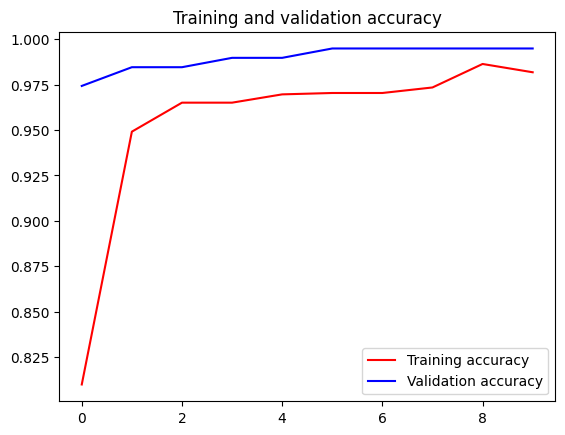

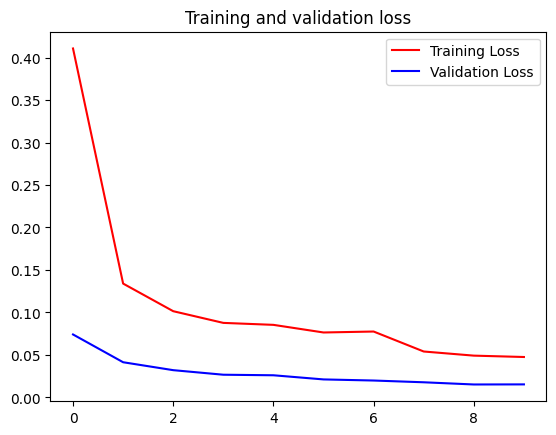

In [24]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()